# generate mock SEDs using the `provabgs` pipeline
These SEDs will be used to construct BGS-like spectra and DESI-like photometry, which will be used for P1 and S1 mock challenge tests

In [1]:
import os
import numpy as np 
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
#if 'NERSC_HOST' not in os.environ.keys():
#    mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
from provabgs import infer as Infer
from provabgs import models as Models

In [3]:
prior = Infer.load_priors([
    Infer.UniformPrior(9., 12., label='sed'), 
    Infer.FlatDirichletPrior(4, label='sed'),   # flat dirichilet priors
    Infer.UniformPrior(0., 1., label='sed'), # burst fraction
    Infer.UniformPrior(0., 13.27, label='sed'), # tburst
    Infer.UniformPrior(6.9e-5, 7.3e-3, label='sed'),# uniform priors on ZH coeff
    Infer.UniformPrior(6.9e-5, 7.3e-3, label='sed'),# uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust1 
    Infer.UniformPrior(0., 3., label='sed'),        # uniform priors on dust2
    Infer.UniformPrior(-2.2, 0.4, label='sed')     # uniform priors on dust_index 
])

# sample $\theta_{\rm obs}$ from prior

In [4]:
# direcotyr on nersc
#dat_dir = '/global/cscratch1/sd/chahah/gqp_mc/mini_mocha/provabgs_mocks/'
# local direcotry
dat_dir = '/Users/chahah/data/gqp_mc/mini_mocha/provabgs_mocks/'

In [5]:
theta_obs = np.load(os.path.join(dat_dir, 'provabgs_mock.theta.npy'))
z_obs = 0.2

In [6]:
m_nmf = Models.NMF(burst=True, emulator=False)

In [7]:
wave_full = []
flux_full = [] 

wave_obs = np.linspace(3e3, 1e4, 1000)
flux_obs = []
for i in range(theta_obs.shape[0]):
    w, f = m_nmf.sed(theta_obs[i], z_obs)
    wave_full.append(w)
    flux_full.append(f)
    
    _, f_obs = m_nmf.sed(theta_obs[i], z_obs, wavelength=wave_obs)
    flux_obs.append(f_obs)

(3000.0, 10000.0)

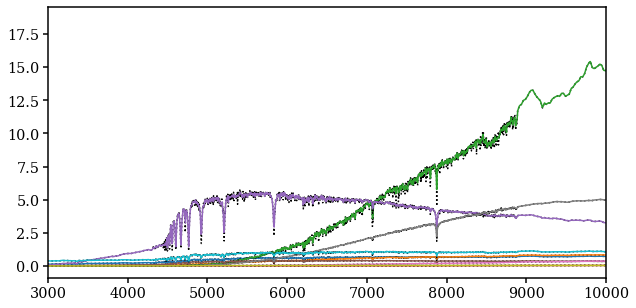

In [9]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for w, f, f_obs in zip(wave_full[:10], flux_full, flux_obs): 
    sub.plot(w, f, c='k', ls=':')
    sub.plot(wave_obs, f_obs)
sub.set_xlim(3e3, 1e4)

# save to file

In [11]:
np.save(os.path.join(dat_dir, 'provabgs_mock.wave_full.npy'), np.array(wave_full))
np.save(os.path.join(dat_dir, 'provabgs_mock.flux_full.npy'), np.array(flux_full))

np.save(os.path.join(dat_dir, 'provabgs_mock.wave_obs.npy'), wave_obs)
np.save(os.path.join(dat_dir, 'provabgs_mock.flux_obs.npy'), np.array(flux_obs))